Wahlpflichtfach Künstliche Intelligenz I: Testat

---

# 01 - Testat zu den Modulen NumPy, matplotlib und pandas
__Gruppennummer:__ 3

__Mitglieder:__
- Joel Daumann
- Joris Schlüter
- Tom Ramos
- Jonah Gerdes
- Marvin Denecke

In [1]:
from IPython.core.pylabtools import figsize
from matplotlib.pyplot import legend
from sklearn.utils.extmath import density
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Seit dem letzten Testat haben Sie die drei Module NumPy, matplotlib und pandas kennengelernt. In diesem Testat werden Sie diese Module zum Lösen von unterschiedlichen Aufgaben verwenden. Sie werden Daten aufbereiten und visualisiern sowie mit NumPy Berechnungen durchführen um ein Klassifikationsproblem zu lösen.

## Aufgabe 1: Daten aufbereiten und visualisieren (5 Punkte)
In der ersten Aufgabe werden Sie das Ebola-Datenset, das Ihnen aus der Vorlesung bereits bekannt ist, aufbereiten und anschließend visualisieren. Dabei gibt es die folgenden Teilaufgaben:
- a) Auswahl der Strategie(n) zum Ersetzen der fehlenden Werte
- b) Implementierung der Ersetzungsstrategie(n)
- c) Überprüfen, ob alle fehlenden Werte ersetzt wurden
- d) Schnelle Visualisierung mit pandas
- e) Visualisierung mit matplotlib

#### a) Auswahl der Strategie(n) zum Ersetzen der fehleden Werte
_Punkte: 1,5_

In der nachfolgenden Codezeile wird das Ebola-Datenset als pandas.DataFrame importiert.

In [2]:
ebola = pd.read_csv('ebola.csv')
ebola.describe(include="all")
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


Überlegen Sie sich eine Strategie, wie die fehlenden Werte sinnvoll ersetzt werden können. Beschreiben Sie ihre Strategie in der folgenden Markdown-Zeile und begründen Sie, warum Sie diese Strategie(n) gewählt haben.

_Tipps:_
- Wenn Sie nicht mehr wissen, wie das Dataset aufgebaut ist, machen Sie sich wieder damit vertraut (z.B. `describe()`, sich einzelne Zeilen angucken).
- Verschaffen Sie sich ein Überblick über die Möglichkeiten zum Ersetzen von fehlenden Werten, die es in pandas gibt (z.B. `fillna`, `interpolate`).

__Ihre Antwort:__

Strategie: <br>
1. interpolate + Werte runden, da es keine halb kranken gibt
2. ffill + bfill
3. Die letzten fehlenden Werte  mit dem Median befüllen

Begründung: <br>
- Interpolate, um die Mittelwerte zwischen dem vorherigen und nachfolgenden Wert zu bilden.
- Um die Randwerte sinnvoll zu befüllen wird ein Forward-Fill und ein Backward-Fill angewendet.
- Anschließend werden die letzten fehlenden Werte mit dem Median befüllt, um z.B. drei aufeinander folgenden NAs, die weder von interpolate noch ffill/bfill abgedeckt werden, zu befüllen.


#### b) Implementierung der Ersetzungsstrategie(n)
_Punkte: 1_

Implementieren Sie die von Ihnen ausgewählte Strategie(n) zum Ersetzen der fehlenden Werte. Speichern Sie das DataFrame ohne fehlende Werte in der Variable `ebola_without_nans`.

In [3]:
# IHRE Lösung HIER
ebola_without_nans = ebola.interpolate(method='quadratic').round().fillna(method='ffill').fillna(method='bfill').fillna(ebola.median)
ebola_without_nans



/tmp/ipykernel_27077/3401825467.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ebola_without_nans = ebola.interpolate(method='quadratic').round().fillna(method='ffill').fillna(method='bfill').fillna(ebola.median)
/tmp/ipykernel_27077/3401825467.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ebola_without_nans = ebola.interpolate(method='quadratic').round().fillna(method='ffill').fillna(method='bfill').fillna(ebola.median)


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1786.0,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
1,1/4/2015,288,2775.0,8166.0,9780.0,20.0,1.0,4.0,1.0,7.0,1781.0,3496.0,2943.0,8.0,0.0,1.0,0.0,6.0
2,1/3/2015,287,2769.0,8166.0,9722.0,20.0,1.0,4.0,1.0,7.0,1767.0,3496.0,2915.0,8.0,0.0,1.0,0.0,6.0
3,1/2/2015,286,2753.0,8157.0,9712.0,20.0,1.0,4.0,1.0,7.0,1757.0,3496.0,2880.0,8.0,0.0,1.0,0.0,6.0
4,12/31/2014,284,2730.0,8115.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3471.0,2827.0,8.0,0.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


#### c) Überprüfen, ob alle fehlenden Werte ersetzt wurden
_Punkte: 0,5_

Nachdem die fehlenden Werte ersetzt wurden, ist es sinnvoll zu prüfen, ob auch wirklich alle fehlenden Werte ersetzt wurden. Nutzen Sie dafür bitte den folgenden Methodenrumpf:
```python
def has_no_nans(df):
    
    return False
```

Der Input-Parameter `df` ist das DataFrame, dass überprüft werden soll. Der Rückgabewert ist `True`, wenn das DataFrame keine fehlenden Werte mehr enthält. Andernfalls wird `False`zurückgegeben.

In [4]:
def has_no_nans(df):
    # IHRE Lösung HIER
    return not df.isna().values.any()

In [5]:
if has_no_nans(ebola_without_nans):  # 
    print('Sehr gut! Wir können mit den Daten jetzt weiterarbeiten.')
else: 
    print('Die von Ihnen ausgewählte Strategie hat nicht geklappt. Versuchen Sie es nochmal.')

Sehr gut! Wir können mit den Daten jetzt weiterarbeiten.


#### d) Schnelle Visualisierung mit pandas
_Punkte: 0,5_

Häufig können mit pandas erste schnelle Graphen erstellt werden, um einen guten, ersten Eindruck über die Datenverteilung zu erhalten. Erstellen Sie mit Hilfe von pandas einen Graphen, der die Fälle und Todesfälle in Guinea im Laufe der Zeit visualisiert. Vergessen Sie nicht, die Achsen zu beschriften.

<Axes: xlabel='time in days', ylabel='deaths'>

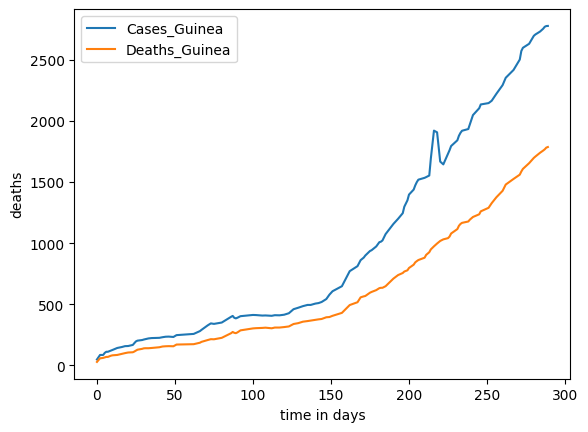

In [6]:
# IHRE Lösung
col_guinea = [c for c in ebola_without_nans.sort_index(ascending=False).columns if 'Guinea' in c]
ebola_without_nans.plot(x='Day', y=col_guinea, xlabel='time in days', ylabel='deaths')

#### e) Visualisierung mit matplotlib
_Punkte: 1,5_

Auch wenn pandas und andere Plotting-Module viele Graphen von sich aus erstellen können, gibt es Fälle, wo diese Graphen mittels matplotlib indivdualisiert werden sollen oder wo die "Standard"-Graphen nicht ausreichen. Daher ist es immer noch ein wichtiger Skill, Graphen nur mit matplotlib erstellen zu können. In dieser Teilaufgabe werden Sie genau dies tun. Dazu gibt es die folgende Beschreibung:
- Für die Todesfälle und Fälle soll es jeweils einen eigenen Graphen geben
- In beiden Graphen sollen die Informationen der Länder Guinea, Liberia und Sierra Leone enthalten sein
- Außerdem sollen die kumulierten Fälle bzw. Tode in jedem Graph enthalten sein
- Achten Sie darauf, dass alles beschriftet ist

/tmp/ipykernel_27077/1257984781.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


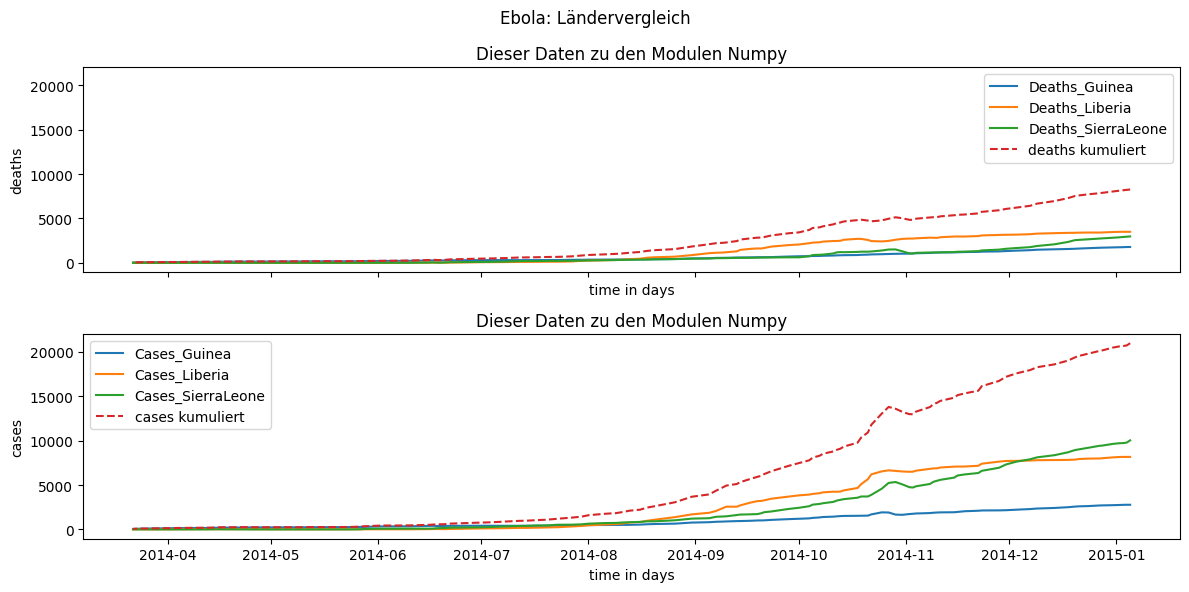

In [7]:
# IHRE Lösung HIER

fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True, sharey=True)
death_cols = ["Deaths_Guinea","Deaths_Liberia","Deaths_SierraLeone"]
cases_cols = ["Cases_Guinea","Cases_Liberia","Cases_SierraLeone"]
cum_deaths = ebola_without_nans[death_cols].sum(axis=1)
cum_cases = ebola_without_nans[cases_cols].sum(axis=1)

x_values = pd.to_datetime(ebola_without_nans['Date'], errors='coerce') if 'Date' in ebola_without_nans.columns else ebola_without_nans.index

for col in death_cols:
    axes[0].plot(x_values, ebola_without_nans[col].T, label=col)

axes[0].plot(x_values, cum_deaths, label='deaths kumuliert', linestyle='--')
axes[0].set(
    xlabel='time in days',
    ylabel='deaths',
    title='Dieser Daten zu den Modulen Numpy',
)
axes[0].legend()

for col in cases_cols:
    axes[1].plot(x_values, ebola_without_nans[col].T, label=col)

axes[1].plot(x_values, cum_cases, label='cases kumuliert', linestyle='--')
axes[1].set(
    xlabel='time in days',
    ylabel='cases',
    title='Dieser Daten zu den Modulen Numpy',
)
axes[1].legend()

fig.suptitle('Ebola: Ländervergleich')
fig.tight_layout()
fig.show()

## Aufagbe 2: Arbeiten mit DataFrames (3 Punkte)
In dieser Aufgabe werden Sie verschiedene Methoden von pandas bzw. pandas.DataFrame verwenden um Anforderungen zu lösen. Als Daten verwenden wir hier ein Datenset, das Informationen über alle Länder der Welt enthält. Sie können das Datenset [hier](https://www.kaggle.com/fernandol/countries-of-the-world) finden. Die Teilaufgaben sind:
- a) Speicheroptimierung
- b) Änderung von Datenskalen
- c) Finden der Länder mit dem höchsten BIP pro Region

In [8]:
countries = pd.read_csv('countries.csv')
countries.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

#### a) Speicheroptimierung
_Punkte: 1_

Inspizieren Sie die Daten. Welche Daten lassen sich effektiver speichern? Schreiben Sie die von Ihnen gefundene(n) Spalte(n) in die nachfolgende Markdown-Zeile und begründen Sie kurz, warum sich diese Spalte effektiver speichern lässt.

__Ihre Antwort:__ <br>

1. Zahlen die als Strings gespeichert sind in Floats ändern, weil einerseits Zahlen weniger Speicherplatz und diese anschließend gedowncastet werden können.
2. Integer Typen prüfen, ob diese in kleineren Integern gespeichert werden können, um Speicherplatz zu sparen.
3. Float Typen prüfen, ob diese in kleinere Floats gepspeichert werden können, um Speicherplatz zu sparen.
4. Region kategorisieren, weil dadurch den Regionen Zahlen zugeorndert werden, welche wiederum weniger Speicherplatz verbrauchen. Diese Zahlen sind Indizes für eine Map, in welcher alle Regionen einmal vertreten sind.



Wandeln Sie die von Ihnen gefundene(n) Spalte(n) in der folgenden Codezeile um.

In [18]:
# IHRE Lösung HIER

# Strings in numerisch Werte umwandeln
df = countries.replace({',': '.'}, regex=True)
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
        df[col] = df[col].round()
    except:
        pass

# Integer downcasten
cols_int64 = df.select_dtypes(include="int64").columns
for col in cols_int64:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

# Floats downcasten
cols_float64 = df.select_dtypes(include="float64").columns
for col in cols_float64:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='float')

# Regionen kategorisieren
df['Region'] = df['Region'].astype('category')

df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.0,23.0,163.0,700.0,36.0,3.0,12.0,0.0,88.0,1.0,47.0,20.0,0.0,0.0,0.0
1,Albania,EASTERN EUROPE,3581655,28748,125.0,1.0,-5.0,22.0,4500.0,86.0,71.0,21.0,4.0,74.0,3.0,15.0,5.0,0.0,0.0,1.0
2,Algeria,NORTHERN AFRICA,32930091,2381740,14.0,0.0,-0.0,31.0,6000.0,70.0,78.0,3.0,0.0,97.0,1.0,17.0,5.0,0.0,1.0,0.0
3,American Samoa,OCEANIA,57794,199,290.0,58.0,-21.0,9.0,8000.0,97.0,260.0,10.0,15.0,75.0,2.0,22.0,3.0,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.0,0.0,7.0,4.0,19000.0,100.0,497.0,2.0,0.0,98.0,3.0,9.0,6.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,420.0,0.0,3.0,20.0,800.0,NaN,145.0,17.0,19.0,64.0,3.0,32.0,4.0,0.0,0.0,1.0
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,100.0,1.0,NaN,NaN,NaN,NaN,0.0
224,Yemen,NEAR EAST,21456188,527970,41.0,0.0,0.0,62.0,800.0,50.0,37.0,3.0,0.0,97.0,1.0,43.0,8.0,0.0,0.0,0.0
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.0,0.0,0.0,88.0,800.0,81.0,8.0,7.0,0.0,93.0,2.0,41.0,20.0,0.0,0.0,0.0


#### b) Änderung von Datenskalen
_Punkte: 1_

Die Skalen der Spalten _Area (sq. mi.)_ und _Pop. Density (per sq. mi.)_ verwenden Quadratmeilen. Da dies für uns Europäer eine komische Skala ist, sollen Sie den Wert in Quadratkilometer umrechnen (1 Quadratkilometer = 0,386102 Quadratmeilen). Implementieren Sie den folgenden Methodenrumpf:
```python
def sq_mi_in_sq_km(series):
    
    return series
```
Der Input-Parameter `series` ist ein pandas.Series-Objekt, das die umzurechenden Werte enthält. Der Rückgabewert ist auch ein pandas.Series-Objekt, das die Werte in Quadratkilometer enthält. 

Wenden Sie anschließend die Methode auf die Spalten an und ändern Sie den Namen der betroffenden Spalten.

In [10]:
# IHRE Lösung HIER
def sq_mi_in_sq_km(series):
    return series / 0.386102

for col in df.columns:
    if 'sq. mi.' in col:
        df[col] = sq_mi_in_sq_km(df[col])
        df = df.rename(columns={col: col.replace('sq. mi.', 'sq. km')})

df.head()

,Country,Region,Population,Area (sq. km),Pop. Density (per sq. km),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,1.677018e+06,124.319481,0.0,23.0,163.0,700.0,36.0,3.0,12.0,0.0,88.0,1.0,47.0,20.0,0.0,0.0,0.0
1,Albania,EASTERN EUROPE,3581655,7.445701e+04,323.748657,1.0,-5.0,22.0,4500.0,86.0,71.0,21.0,4.0,74.0,3.0,15.0,5.0,0.0,0.0,1.0
2,Algeria,NORTHERN AFRICA,32930091,6.168681e+06,36.259850,0.0,-0.0,31.0,6000.0,70.0,78.0,3.0,0.0,97.0,1.0,17.0,5.0,0.0,1.0,0.0
3,American Samoa,OCEANIA,57794,5.154078e+02,751.096863,58.0,-21.0,9.0,8000.0,97.0,260.0,10.0,15.0,75.0,2.0,22.0,3.0,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,1.212115e+03,393.678375,0.0,7.0,4.0,19000.0,100.0,497.0,2.0,0.0,98.0,3.0,9.0,6.0,NaN,NaN,NaN


#### c) Finden der Länder mit dem höchsten BIP (GDP) pro Region
Geben Sie ein DataFrame aus, das das Land einer jeden Region enthält, welches den höchsten BIP aufweist. Das DataFrame soll die spalten Region, Land und BIP enthalten. 

In [11]:
# IHRE Lösung HIER
country_col_name = 'Country'
gdp_col_name = 'GDP ($ per capita)'

idx_max_gdp = df.groupby('Region')[gdp_col_name].idxmax()
result_df = df.loc[idx_max_gdp, ['Region', country_col_name, gdp_col_name]].copy()
result_df.columns = ['Region', 'Land', 'BIP']
result_df_sorted = result_df.sort_values('BIP', ascending=False)

print(result_df_sorted)

                                  Region                   Land      BIP
121  WESTERN EUROPE                                 Luxembourg   55100.0
214  NORTHERN AMERICA                            United States   37800.0
38               LATIN AMER. & CARIB            Cayman Islands   35000.0
11   OCEANIA                                         Australia   29000.0
91         ASIA (EX. NEAR EAST)                      Hong Kong   28800.0
212  NEAR EAST                            United Arab Emirates   23200.0
186  EASTERN EUROPE                                   Slovenia   19000.0
64   BALTICS                                           Estonia   12300.0
133  SUB-SAHARAN AFRICA                              Mauritius   11400.0
169                 C.W. OF IND. STATES                 Russia    8900.0
205  NORTHERN AFRICA                                   Tunisia    6900.0


/tmp/ipykernel_27077/3064661694.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idx_max_gdp = df.groupby('Region')[gdp_col_name].idxmax()


## Aufgabe 3: Baue ein Klassifikator mit NumPy (2 Punkte)
In der letzten Aufgabe werden Sie einen Klassifikator bauen. Betrachten Sie sich zunächst den folgenden Graphen:

In [12]:
import seaborn as sns

sns.set_theme()

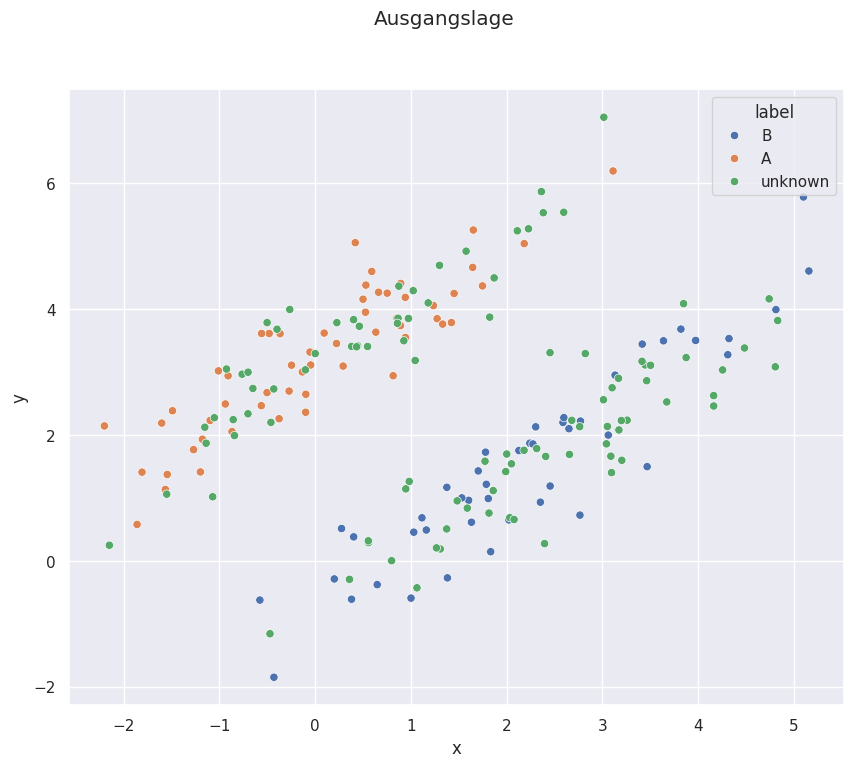

In [13]:
classification_data = pd.read_csv('classification_data.csv', index_col=0)

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Ausgangslage')
sns.scatterplot(x=classification_data.x, y=classification_data.y, hue=classification_data.label)  # noqa: F821
plt.show()

Der Graph zeigt zwei Punktewolken - eine für das Label _A_ und eine für das Label _B_ - die linear separierbar sind. Allerdings ist noch nicht jedem Datenpunkt ein Label zugewiesen. Dies ist Ihre Aufgabe. Dafür führen Sie bitte die folgenden Schritte durch:
- a) Bestimmen Sie die Trennlinie
- b) Implementieren Sie den Klassifikator

#### a) Bestimmen Sie die Trennlinie
_Punkte: 0,5_

Da die Daten durch eine einfache gerade Linie trennbar sind, kann man diese Eigenschaft nutzen, um einen Klassifikator zu bauen. Dabei wird jedem Wert der größer ist als die Linie ein Label zugewiesen und jedem Wert der kleiner ist als die Linie das andere Label. Daher ist Ihre erste Aufgabe diese Linie zu bestimmen. Geben Sie dafür in der nachfolgenden Zeile die nötigen x- und y-Koordinaten von zwei Punkten am jeweiligen Ende dieser Linie an, die benötigt werden, um die Linie zu ploten.

In [14]:
df = classification_data

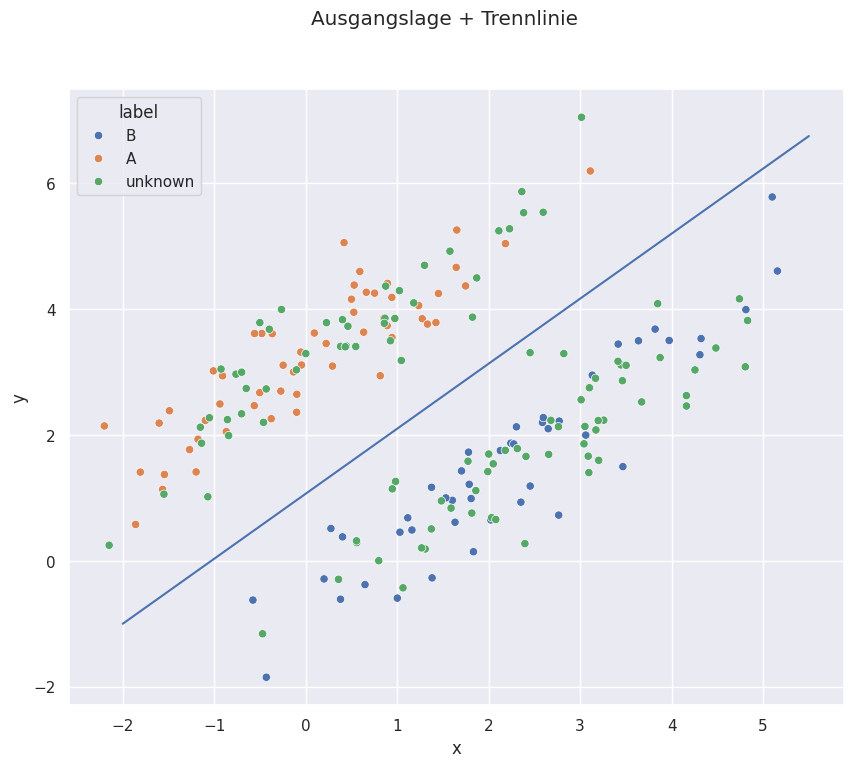

In [15]:
x = [-2, 5.5] # IHRE Lösung HIER
y = [-1, 6.75] # IHRE Lösung HIER

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Ausgangslage + Trennlinie')
sns.scatterplot(x=classification_data.x, y=classification_data.y, hue=classification_data.label)  # noqa: F821
plt.plot(x, y)
plt.show()

#### b) Implementieren Sie den Klassifikator
_Punkte: 1,5_

Nun können Sie den Klassifikator implementieren. Nutzen Sie dafür den folgenden Methodenrumpf und NumPy-Methoden:
```python
def classify(data):
    
    return labels
```
Der Input-Parameter ist ein NumPy 2d-Array mit 2 Spalten und beliebig vielen Zeilen. Der Rückgabewert ist ein NumPy 1d-Array in der Länge des Input Arrays, dass für jeden Datenpunkt, das entsprechende Label enthält.

In [16]:
def classify(data):
    line_vector = np.array([x[1],y[1]]) - np.array([x[0],y[0]])
    # x und y aus data
    point_x = data[:, 0]
    point_y = data[:, 1]
 
    # Vektor zu den Punkten
    to_point_x = point_x - x[0]
    to_point_y = point_y - y[0]
 
    # Kreuzprodukt (Vektorisiert)
    cross = line_vector[0] * to_point_y - line_vector[1] * to_point_x
 
    # Ergebnisse als Liste von Strings
    result = np.full(cross.shape, "auf der Linie", dtype=object)
    result[cross > 0] = "A"
    result[cross < 0] = "B"
    return result

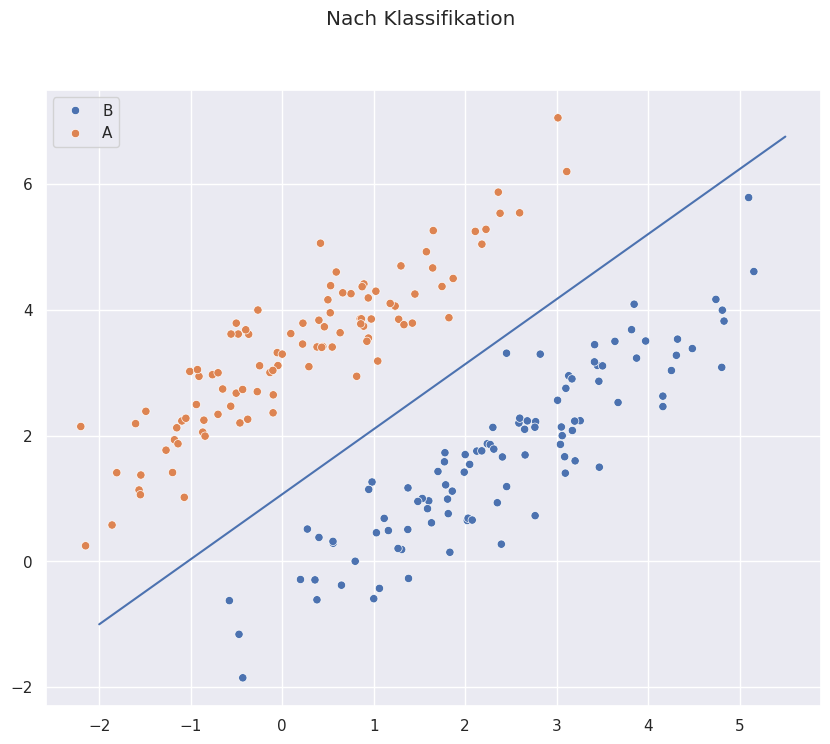

In [17]:
known_data = classification_data.loc[classification_data.label != 'unknown']  # noqa: F821
unknown_data_points = classification_data.loc[classification_data.label == 'unknown', 'x':'y'].values  # noqa: F821
labels_for_unknown_data = classify(unknown_data_points)

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Nach Klassifikation')
sns.scatterplot(x=np.append(known_data.x.values, unknown_data_points[:, 0]), 
                y=np.append(known_data.y.values, unknown_data_points[:, 1]),
                hue=np.append(known_data.label.values, labels_for_unknown_data))
plt.plot(x, y)
plt.show()

---

Wahlpflichtfach Künstliche Intelligenz I: Testat